<a href="https://colab.research.google.com/github/bulent-1111/Deep_Learning/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [69]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [71]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)

In [72]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [74]:
df.columns

Index(['IPN31152N'], dtype='object')

# Indest Data

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

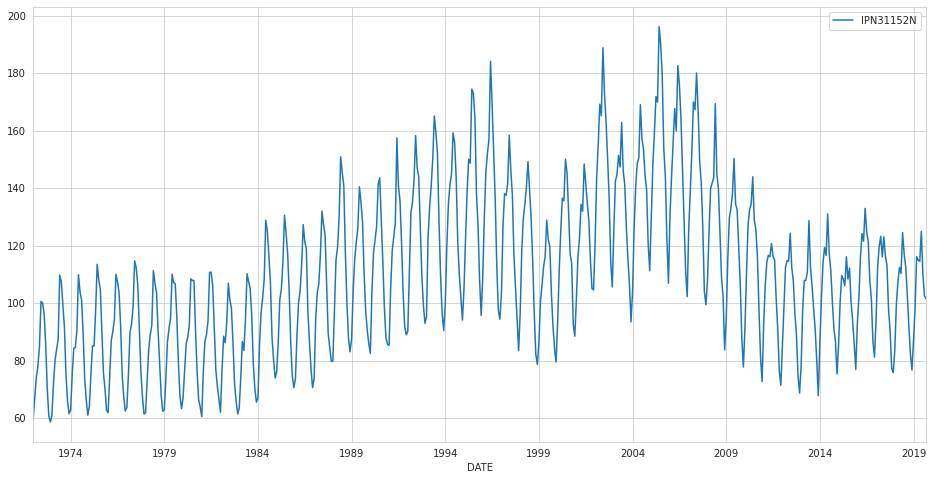

In [75]:
df.plot(figsize=(16,8))

In [76]:
df.columns = ['Production']

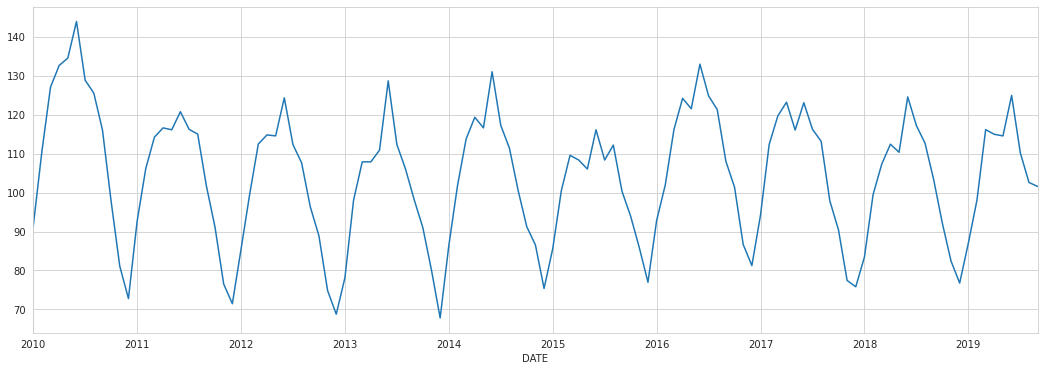

In [77]:
df['Production'].loc["2010-01-01" : "2019-12-31"].plot(figsize=(18,6))

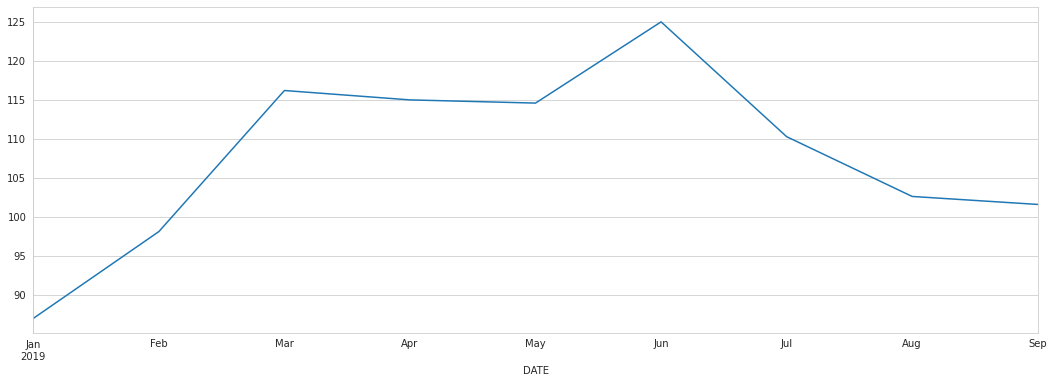

In [78]:
df['Production'].loc["2019-01-01" : "2019-12-31"].plot(figsize=(18,6));

In [79]:
df.duplicated().sum()

0

In [80]:
df.isnull().sum()

Production    0
dtype: int64

# Preprocessing of Data

## Train Test Split

In [81]:
len(df)
#2019 -> 9.aya kadar. 3 ay eksik

573

In [82]:
2019-1972


47

In [83]:
test_size = 18

In [84]:
test_ind = len(df) - test_size
test_ind

555

In [85]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [86]:
train.shape,test.shape

((555, 1), (18, 1))

In [87]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434


In [88]:
test

,Production
DATE,
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584
2018-07-01,117.222
2018-08-01,112.678
2018-09-01,103.312
2018-10-01,92.132
2018-11-01,82.435
2018-12-01,76.761


## Scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [92]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [93]:
length = 12 
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [94]:
len(generator) #555-12, son 12 lik kisimda islem yapamayagi icin, target belirleyemiyor

543

In [95]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [96]:
train_scaled[0:13]

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221]])

In [97]:
X, y = generator[0]

In [98]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [99]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [100]:
train_scaled.shape

(555, 1)

In [101]:
n_features = train_scaled.shape[1]

In [102]:
model = Sequential()

model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
                                        # bundan sonraki katmanda lstm ,gru gelecekse bu True yapilir 
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 50)                30200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [104]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)

In [105]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [106]:
model.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
543/543 [==============================] - 6s 6ms/step - loss: 0.0190 - val_loss: 0.0060
Epoch 2/20
543/543 [==============================] - 3s 6ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 3/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 4/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 5/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 6/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 7/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0033 - val_loss: 0.0022


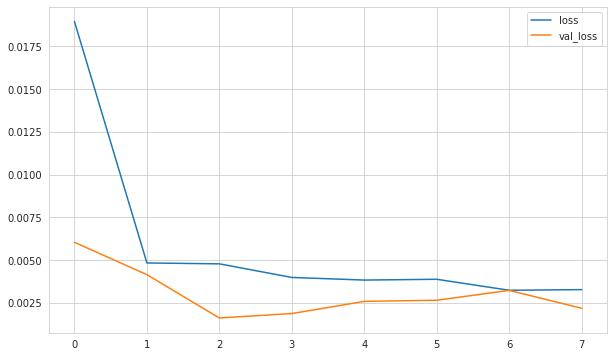

In [107]:
losses = pd.DataFrame(model.history.history)
losses.plot();

### Evaluation on Test Data

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [110]:
train_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

In [111]:
df.index[0]

Timestamp('1972-01-01 00:00:00')

In [112]:
df.index[1]

Timestamp('1972-02-01 00:00:00')

In [113]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [114]:
predictions_scaled

[array([0.42062092], dtype=float32),
 array([0.4541292], dtype=float32),
 array([0.46519145], dtype=float32),
 array([0.43224508], dtype=float32),
 array([0.36522648], dtype=float32),
 array([0.27471173], dtype=float32),
 array([0.20296751], dtype=float32),
 array([0.17045535], dtype=float32),
 array([0.19303618], dtype=float32),
 array([0.25105086], dtype=float32),
 array([0.3220214], dtype=float32),
 array([0.38622358], dtype=float32)]

In [115]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8524399081985577 
mae: 0.035197853530976105 
mse: 0.0016823972389896297 
rmse: 0.041017035960557044


### Inverse Transformation and Comparing

In [116]:
predictions = scaler.inverse_transform(predictions_scaled)

In [117]:
compare = test[:12]

In [118]:
compare['Predictions'] = predictions

In [119]:
compare

,Production,Predictions
DATE,,
2018-04-01,112.431,116.501
2018-05-01,110.354,121.109
2018-06-01,124.584,122.630
2018-07-01,117.222,118.100
2018-08-01,112.678,108.884
2018-09-01,103.312,96.436
2018-10-01,92.132,86.571
2018-11-01,82.435,82.100
2018-12-01,76.761,85.205


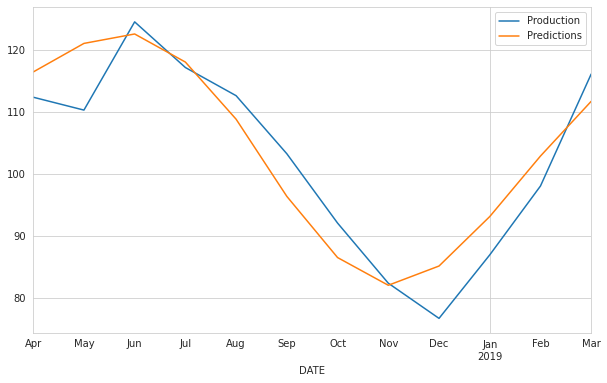

In [120]:
compare.plot()

## with "relu" activation function

In [68]:
model_relu = Sequential()

model_relu.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_relu.add(LSTM(50, activation = 'relu'))
model_relu.add(Dense(1))
model_relu.compile(optimizer = 'adam', loss = 'mse')


In [121]:
model_relu.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
543/543 [==============================] - 25s 42ms/step - loss: 0.0293 - val_loss: 0.0020
Epoch 2/20
543/543 [==============================] - 22s 41ms/step - loss: 0.0105 - val_loss: 0.0027
Epoch 3/20
543/543 [==============================] - 22s 41ms/step - loss: 0.0065 - val_loss: 0.0046
Epoch 4/20
543/543 [==============================] - 27s 50ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 5/20
543/543 [==============================] - 24s 44ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 6/20
543/543 [==============================] - 30s 56ms/step - loss: 0.0065 - val_loss: 0.0021


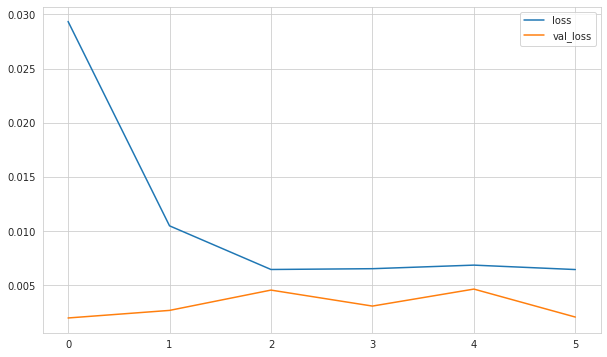

In [123]:
losses = pd.DataFrame(model_relu.history.history)
losses.plot();

In [124]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_relu.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Evaluation on Test Data

In [125]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5740684386685941 
mae: 0.05371907175537773 
mse: 0.0048562322917685774 
rmse: 0.06968667226786322


### Inverse Transformation and Comparing

In [126]:
predictions = scaler.inverse_transform(predictions_scaled)

In [127]:
compare = test[:12]

In [128]:
compare['Predictions'] = predictions

In [129]:
compare

,Production,Predictions
DATE,,
2018-04-01,112.431,118.467
2018-05-01,110.354,118.956
2018-06-01,124.584,119.434
2018-07-01,117.222,116.817
2018-08-01,112.678,112.201
2018-09-01,103.312,103.942
2018-10-01,92.132,99.657
2018-11-01,82.435,94.239
2018-12-01,76.761,95.852


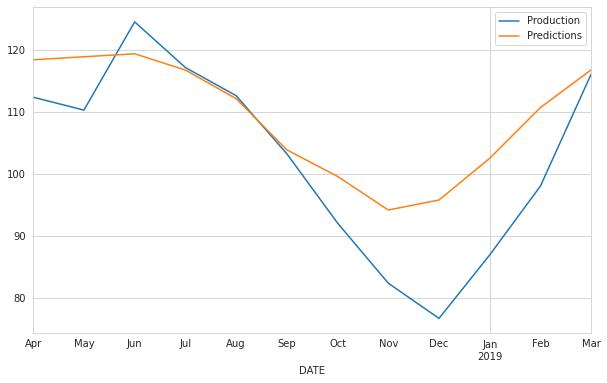

In [130]:
compare.plot();

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [131]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [132]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [133]:
len(df)

573

In [134]:
len(generator)

561

In [135]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 6s 5ms/step - loss: 0.0196
Epoch 2/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 3/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0041
Epoch 4/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0042
Epoch 5/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0039
Epoch 6/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0037
Epoch 7/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 8/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0033
Epoch 9/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0038
Epoch 10/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 11/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0031
Epoch 12/15
561/561 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 13/15
561/561 [====

In [136]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [137]:
forecast = scaler.inverse_transform(forecast)

In [138]:
forecast_index = pd.date_range(start = '2019-09-01', periods = length, freq = 'MS') 

In [139]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [140]:
forecast_df

,Forecast
2019-09-01,90.809
2019-10-01,85.117
2019-11-01,88.578
2019-12-01,98.653
2020-01-01,109.093
2020-02-01,116.838
2020-03-01,122.795
2020-04-01,127.158
2020-05-01,127.864
2020-06-01,122.724


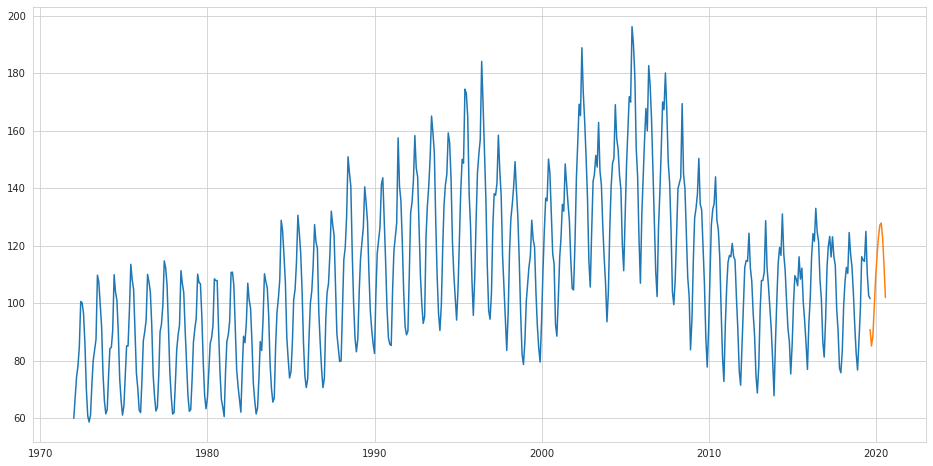

In [141]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

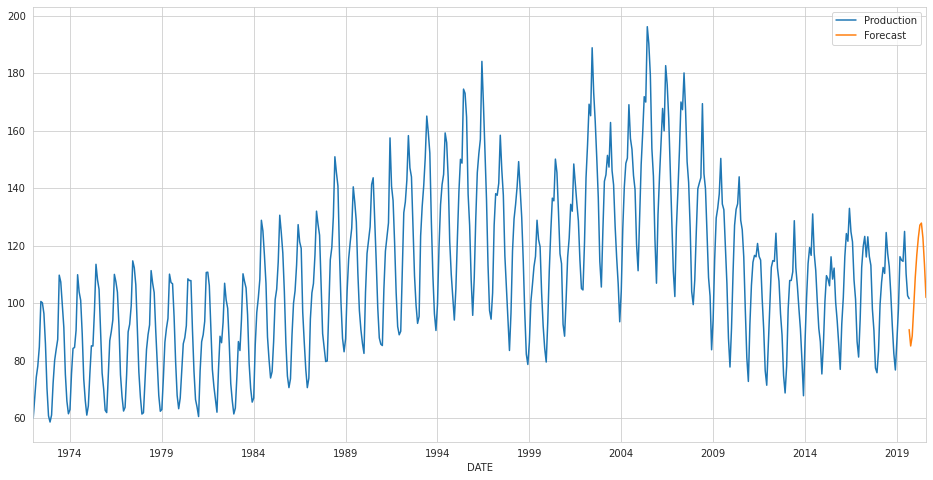

In [142]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

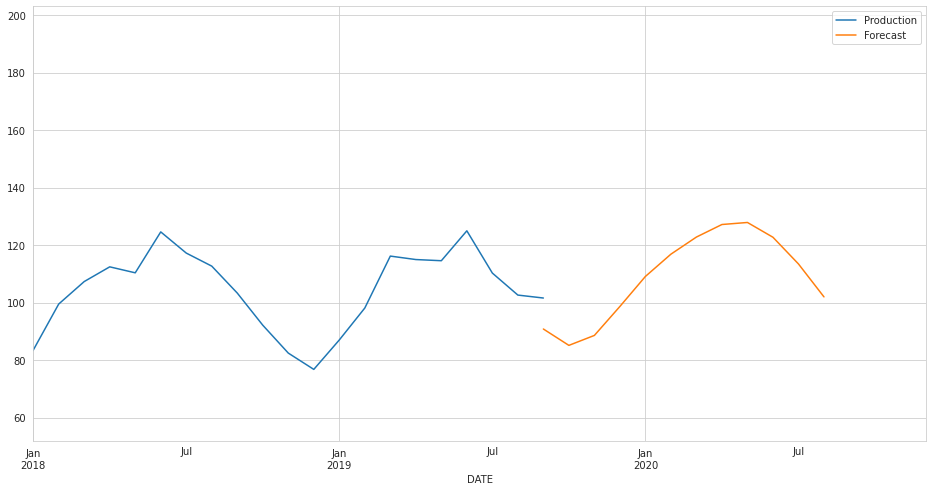

In [143]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

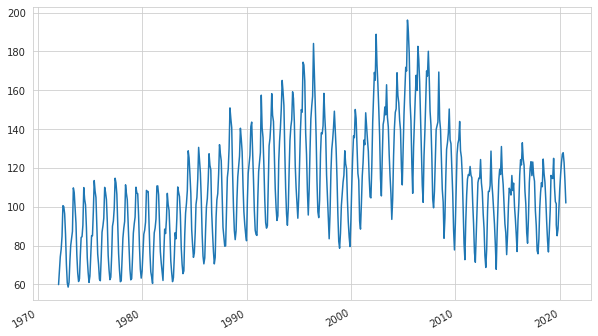

In [144]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)
dataset_total.plot();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___